# Import des librairies

Les librairies utilisées pour ce notebook sont les suivantes :
- numpy : pour la manipulation de tableaux
- pandas : pour la manipulation de données
- matplotlib : pour la visualisation de données
- seaborn : pour la visualisation de données
- sklearn : pour la création de modèles de machine learning

L'utilisation de la commande magique %matplotlib inline permet d'afficher les graphiques directement dans le notebook.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

%matplotlib inline

# Pipeline

Nous allons structurer le code en plusieurs cellules dans un Jupyter Notebook pour faciliter la compréhension et le débogage. Chaque cellule contient une fonction ou une étape du pipeline de traitement des données.

Nous commençons par importer la bibliothèque pandas, essentielle pour la manipulation des données sous forme de DataFrames.

In [54]:
import pandas as pd

La fonction __load_data__ charge un fichier CSV à partir d'un chemin donné et retourne un DataFrame pandas.

In [55]:
def load_data(file_path):
    print("\n--- Loading Data ---")
    print(f"Loading data from {file_path}")
    return pd.read_csv(file_path)


La fonction __drop_unnecessary_columns__ supprime les colonnes __Over18__, __StandardHours__ et __EmployeeCount__ du DataFrame.

In [56]:
def drop_unnecessary_columns(df):
    print("\n--- Dropping Unnecessary Columns ---")
    print("Dropping unnecessary columns: 'Over18', 'StandardHours', 'EmployeeCount'")
    return df.drop(columns=['Over18', 'StandardHours', 'EmployeeCount'])


La fonction __merge_dataframes__ fusionne 3 jeux de données sur la colonne EmployeeID, créant ainsi un DataFrame unifié.

In [57]:
def merge_dataframes(general_data, employee_survey_data, manager_survey_data):
    print("\n--- Merging DataFrames ---")
    print("Merging dataframes on 'EmployeeID'")
    dataset = pd.merge(general_data, employee_survey_data, on='EmployeeID')
    dataset = pd.merge(dataset, manager_survey_data, on='EmployeeID')
    return dataset


La fonction __clean_dataframe__ nettoie le DataFrame en supprimant les valeurs manquantes, en arrondissant l'âge, en encodant les colonnes catégorielles, et en convertissant les valeurs booléennes en 0 et 1.

In [58]:
def clean_dataframe(df):
    """
    Cleans a DataFrame by performing the following steps:
    - Identifies categorical columns.
    - Drops rows with missing values.
    - Rounds the 'Age' column to the nearest decade.
    - Converts categorical columns to numerical using one-hot encoding.
    - Converts specific values (e.g., 'Yes', 'No', 'True', 'False') to 0 and 1.
    - Ensures all boolean columns are converted to integers (0 and 1).
    """

    # Identify categorical columns
    level_columns = ["Education", "JobLevel", "JobRole", "StockOptionLevel", "EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance", "JobInvolvement", "PerformanceRating"]
    other_columns = ["BusinessTravel", "Department", "EducationField", "Gender", "MaritalStatus"]
    categorical_columns = level_columns + other_columns

    print("\n--- Cleaning Data ---")

    # Drop rows with missing values
    df = df.dropna()

    # Round the 'Age' column to the lower decade
    if 'Age' in df.columns:
        df.loc[:, 'Age'] = df['Age'].apply(lambda x: int(np.floor(x / 10.0)) * 10)

    # Round the 'DistanceFromHome' column to the lower 5km
    if 'DistanceFromHome' in df.columns:
        df.loc[:, 'DistanceFromHome'] = df['DistanceFromHome'].apply(lambda x: int(np.floor(x / 5.0)) * 5)

    # Round the 'MonthlyIncome' column to the lower 10 000k
    if 'MonthlyIncome' in df.columns:
        df.loc[:, 'MonthlyIncome'] = df['MonthlyIncome'].apply(lambda x: int(np.floor(x / 10000.0)) * 10000)

    # Convert categorical columns to numerical using one-hot encoding
    df = pd.get_dummies(df, columns=categorical_columns)

    # Convert specific values to 0 and 1
    if 'Attrition' in df.columns:
        df.loc[:, 'Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
    df = df.replace({'Yes': 1, 'No': 0})
    df = df.replace({'True': 1, 'False': 0})

    # Ensure all boolean columns are converted to integers (0 and 1)
    bool_columns = df.select_dtypes(include=['bool']).columns
    df[bool_columns] = df[bool_columns].astype(int)

    print("Data cleaning completed.")

    return df

La fonction __load_and_prepare_data__ charge les données à partir de plusieurs fichiers CSV et retourne les DataFrames correspondants.

In [59]:
def load_and_prepare_data():
    print("\n--- Loading and Preparing Data ---")
    # Load data from the csv files
    general_data = load_data('Datasets/general_data.csv')
    employee_survey_data = load_data('Datasets/employee_survey_data.csv')
    manager_survey_data = load_data('Datasets/manager_survey_data.csv')
    in_time = load_data('Datasets/in_time.csv')
    out_time = load_data('Datasets/out_time.csv')

    return general_data, employee_survey_data, manager_survey_data, in_time, out_time


La fonction __process_general_data__ traite les données générales en appellant __drop_unnecessary_columns__ pour retirer les colonnes inutiles.

In [60]:
def process_general_data(general_data):
    print("\n--- Processing General Data ---")
    # Drop the columns that are not needed
    general_data = drop_unnecessary_columns(general_data)
    return general_data


La fonction __merge_all_data__ fusionne toutes les données en un seul DataFrame en utilisant EmployeeID comme clé.

In [61]:
def merge_all_data(general_data, employee_survey_data, manager_survey_data):
    print("\n--- Merging All Data ---")
    # Merge the dataframes into a single dataset using the employee_id as the key
    dataset = merge_dataframes(general_data, employee_survey_data, manager_survey_data)
    return dataset


La fonction __normalize_data__ normalise les données en utilisant une mise à l'échelle Min-Max, ce qui permet de ramener toutes les valeurs entre 0 et 1.

In [62]:
def normalize_dataframe(df):
    print("\n--- Normalizing Data ---")
    # Normalize the data using Min-Max scaling
    df = (df - df.min()) / (df.max() - df.min())
    print("Data normalized.")
    return df


Cette cellule exécute l'ensemble du pipeline de données, en appelant les fonctions définies précédemment, pour transformer les données brutes en un DataFrame prêt pour l'analyse.

In [63]:
print("\n--- Starting Data Pipeline ---")
general_data, employee_survey_data, manager_survey_data, in_time, out_time = load_and_prepare_data()
general_data = process_general_data(general_data)
dataset = merge_all_data(general_data, employee_survey_data, manager_survey_data)
dataset = clean_dataframe(dataset)

# Save the dataset to a csv file
dataset.to_csv('Datasets/cleaned_dataset.csv', index=False)

dataset = normalize_dataframe(dataset)

# Save the dataset to a csv file
dataset.to_csv('Datasets/cleaned_2_dataset.csv', index=False)

# Remove the employee_id column
dataset = dataset.drop(columns='EmployeeID')
print("Data pipeline completed.")



--- Starting Data Pipeline ---

--- Loading and Preparing Data ---

--- Loading Data ---
Loading data from Datasets/general_data.csv

--- Loading Data ---
Loading data from Datasets/employee_survey_data.csv

--- Loading Data ---
Loading data from Datasets/manager_survey_data.csv

--- Loading Data ---
Loading data from Datasets/in_time.csv

--- Loading Data ---
Loading data from Datasets/out_time.csv

--- Processing General Data ---

--- Dropping Unnecessary Columns ---
Dropping unnecessary columns: 'Over18', 'StandardHours', 'EmployeeCount'

--- Merging All Data ---

--- Merging DataFrames ---
Merging dataframes on 'EmployeeID'

--- Cleaning Data ---
Data cleaning completed.

--- Normalizing Data ---
Data normalized.


/tmp/ipykernel_480/3678096679.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})


Data pipeline completed.


# Analyse exploratoire des données

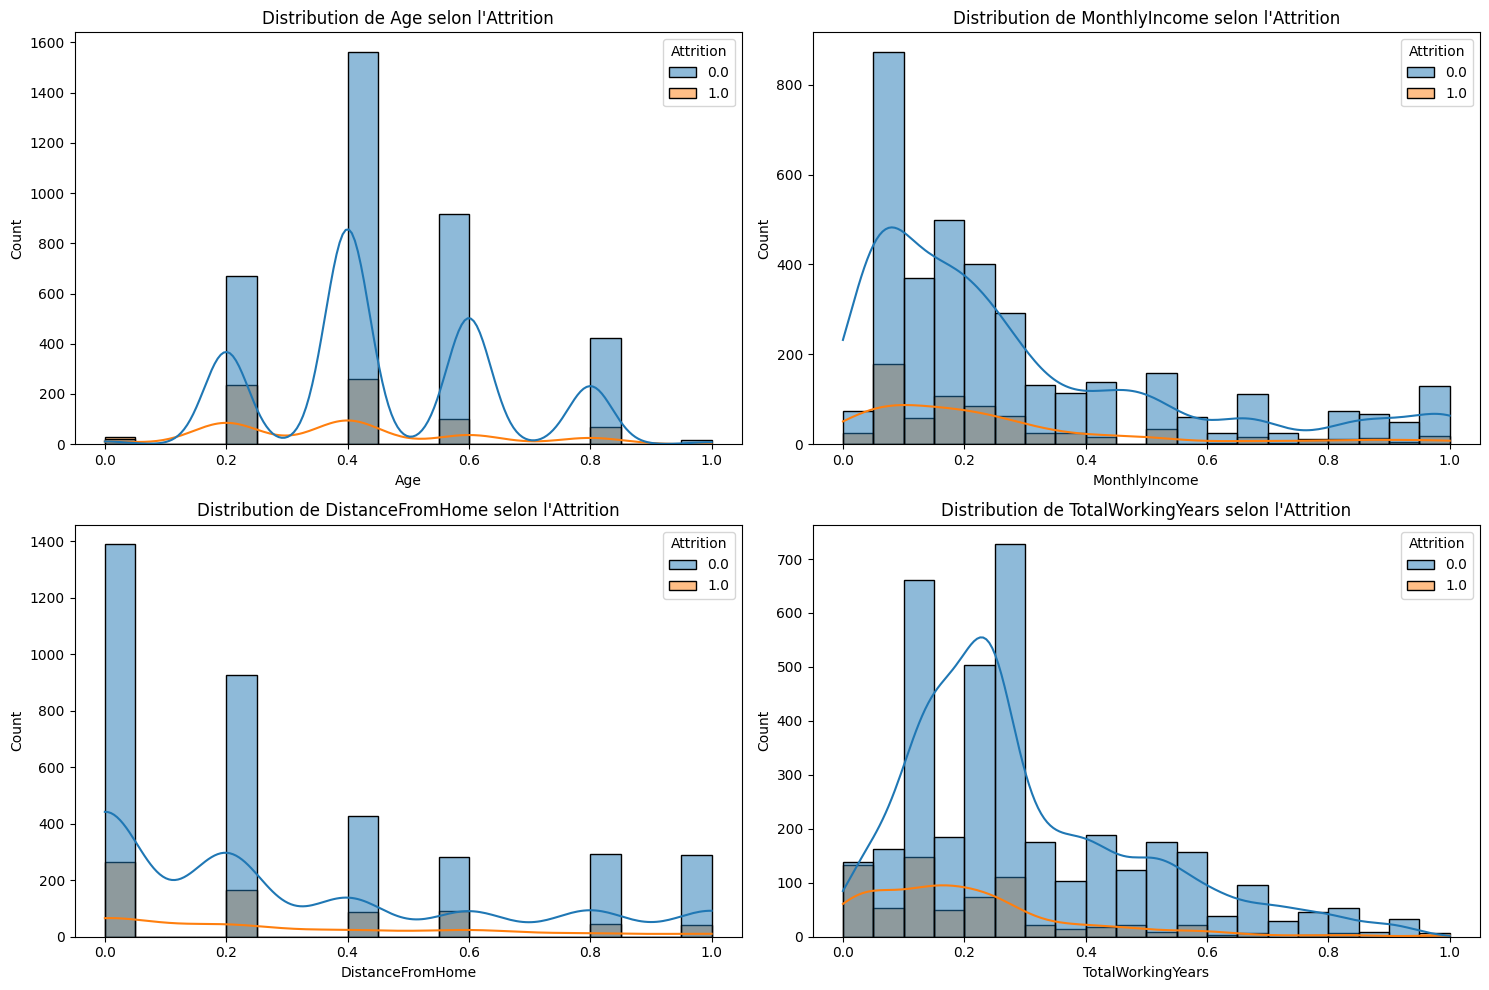

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des variables à afficher
columns = ["Age", "MonthlyIncome", "DistanceFromHome", "TotalWorkingYears"]

plt.figure(figsize=(15,10))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dataset, x=col, hue="Attrition", kde=True, bins=20)
    plt.title(f"Distribution de {col} selon l'Attrition")
plt.tight_layout()
plt.show()

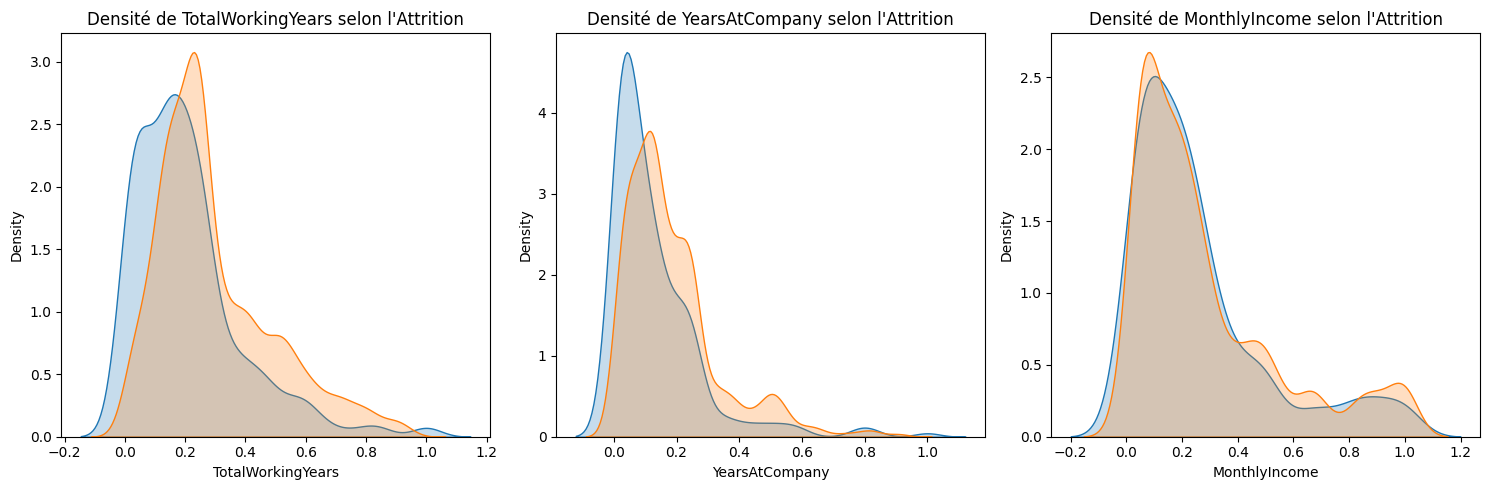

In [65]:
columns = ["TotalWorkingYears", "YearsAtCompany", "MonthlyIncome"]

plt.figure(figsize=(15,5))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(dataset[dataset["Attrition"] == 1][col], label="Attrition", fill=True)
    sns.kdeplot(dataset[dataset["Attrition"] == 0][col], label="Non-Attrition", fill=True)
    plt.title(f"Densité de {col} selon l'Attrition")
plt.tight_layout()
plt.show()

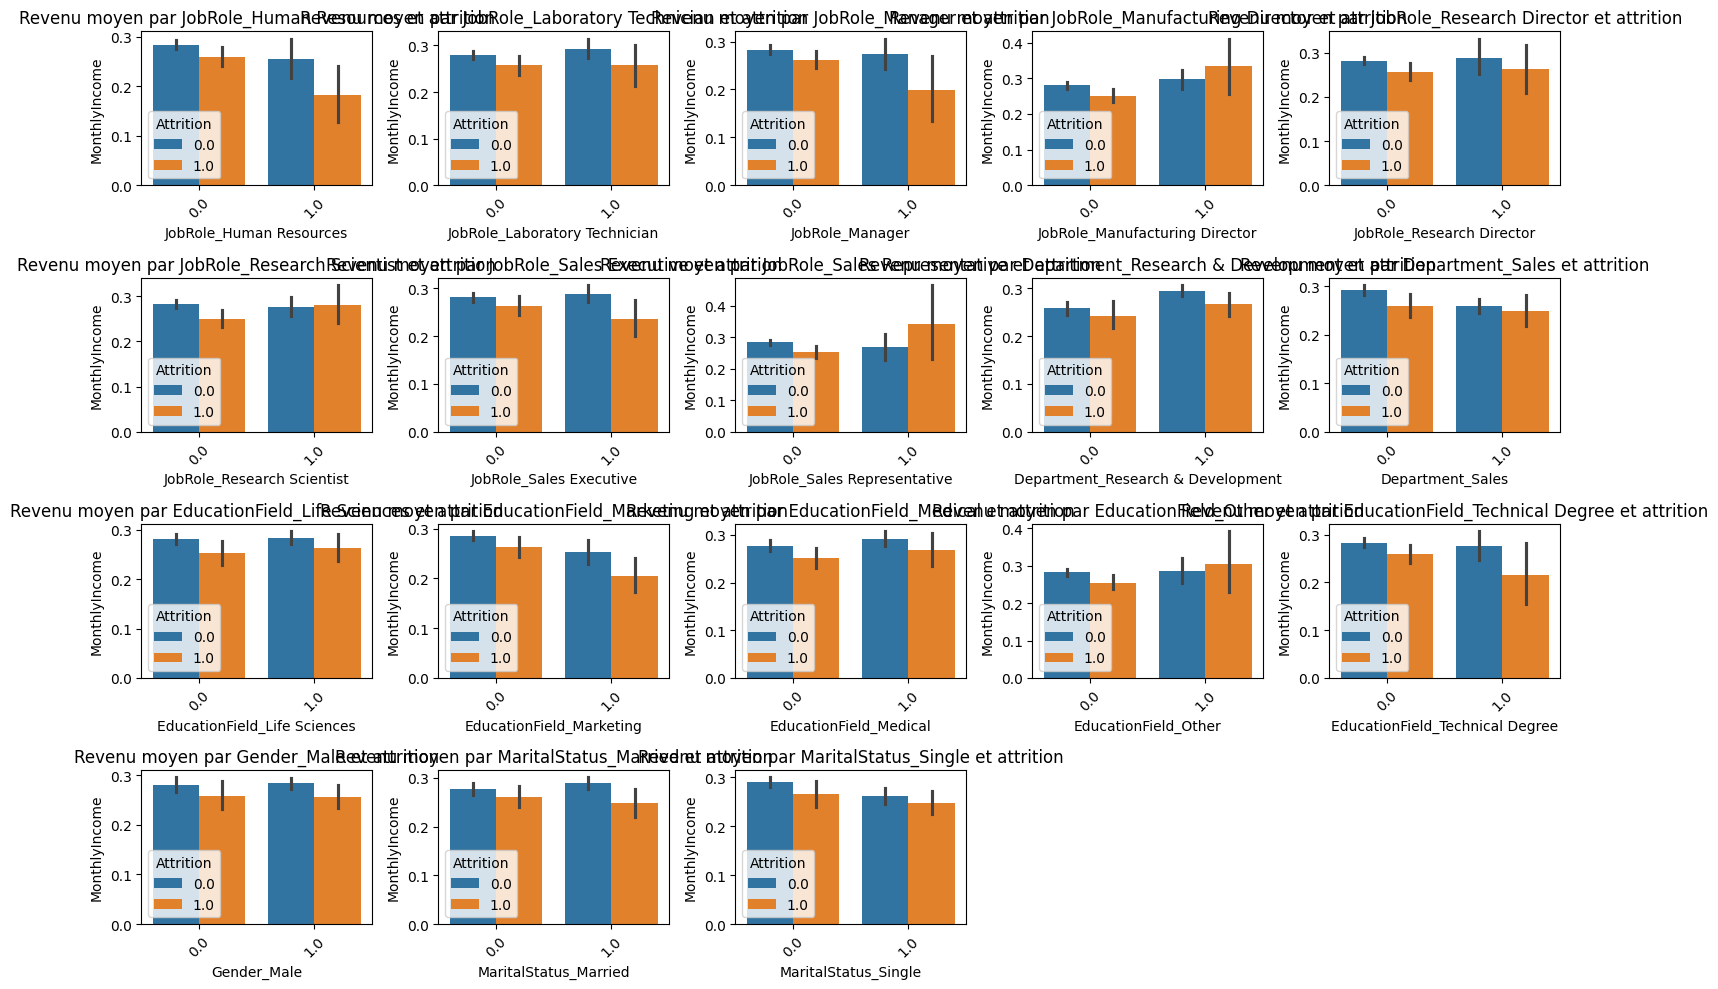

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes catégorielles à analyser
columns = [
    'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager',
    'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist',
    'JobRole_Sales Executive', 'JobRole_Sales Representative',
    'Department_Research & Development', 'Department_Sales',
    'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical',
    'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male',
    'MaritalStatus_Married', 'MaritalStatus_Single'
]

# Création de graphiques pour chaque colonne catégorielle
plt.figure(figsize=(15,10))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 5, i)  # 4 lignes et 5 colonnes pour afficher les graphiques
    sns.barplot(x=col, y="MonthlyIncome", hue="Attrition", data=dataset)
    plt.title(f"Revenu moyen par {col} et attrition")
    plt.xticks(rotation=45)  # Rotation des labels sur l'axe X pour plus de clarté
plt.tight_layout()
plt.show()

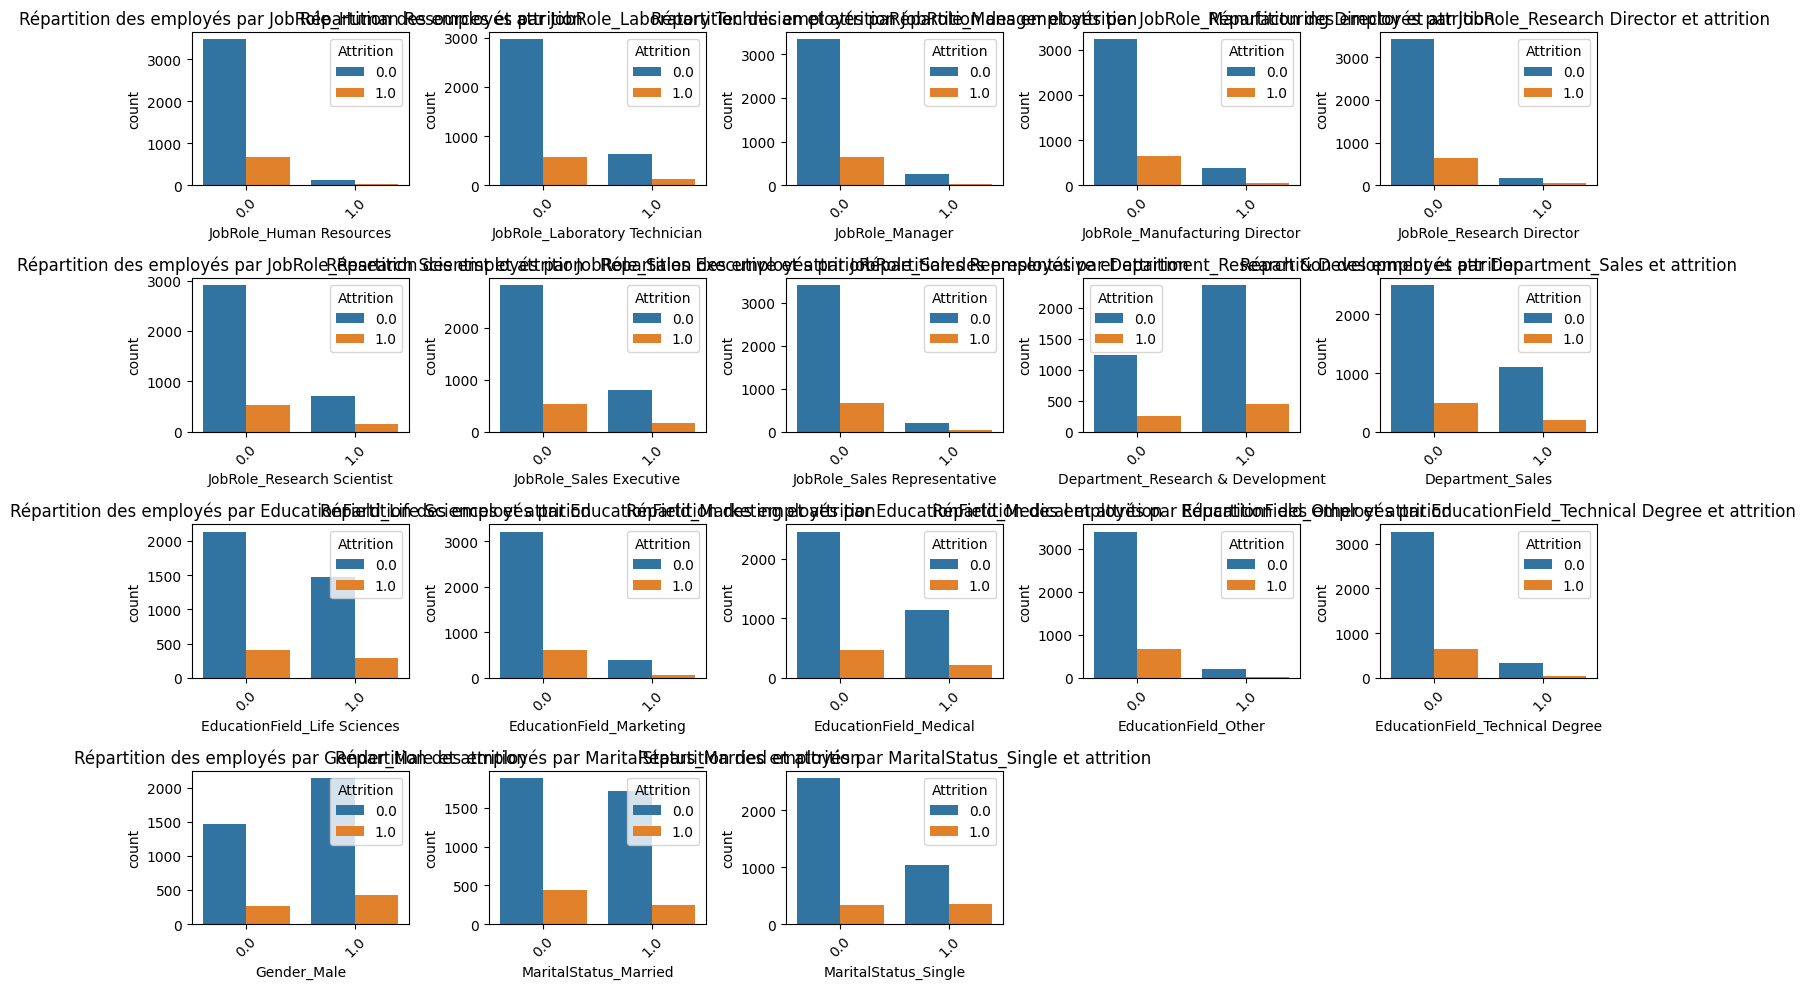

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des colonnes à analyser
columns = [
    'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager',
    'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist',
    'JobRole_Sales Executive', 'JobRole_Sales Representative',
    'Department_Research & Development', 'Department_Sales',
    'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical',
    'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male',
    'MaritalStatus_Married', 'MaritalStatus_Single'
]

# Création de graphiques pour chaque colonne catégorielle
plt.figure(figsize=(15,10))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 5, i)  # 4 lignes et 5 colonnes pour afficher les graphiques
    sns.countplot(x=col, hue="Attrition", data=dataset)
    plt.title(f"Répartition des employés par {col} et attrition")
    plt.xticks(rotation=45)  # Rotation des labels sur l'axe X pour plus de clarté
plt.tight_layout()
plt.show()

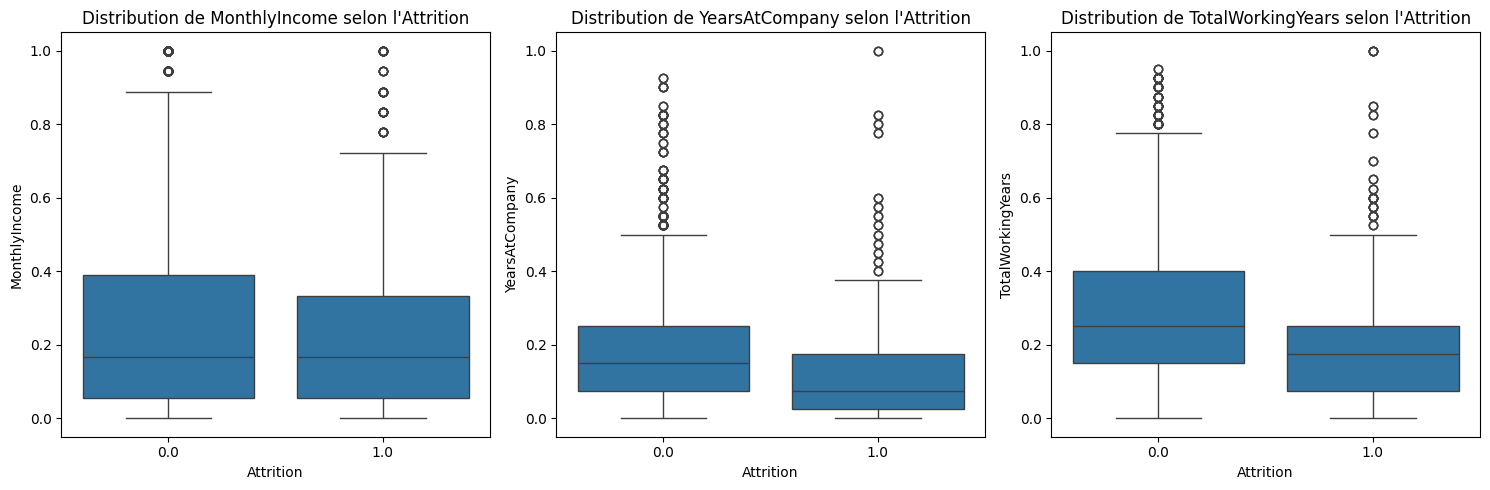

In [68]:
columns = ["MonthlyIncome", "YearsAtCompany", "TotalWorkingYears"]

plt.figure(figsize=(15,5))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Attrition", y=col, data=dataset)
    plt.title(f"Distribution de {col} selon l'Attrition")
plt.tight_layout()
plt.show()

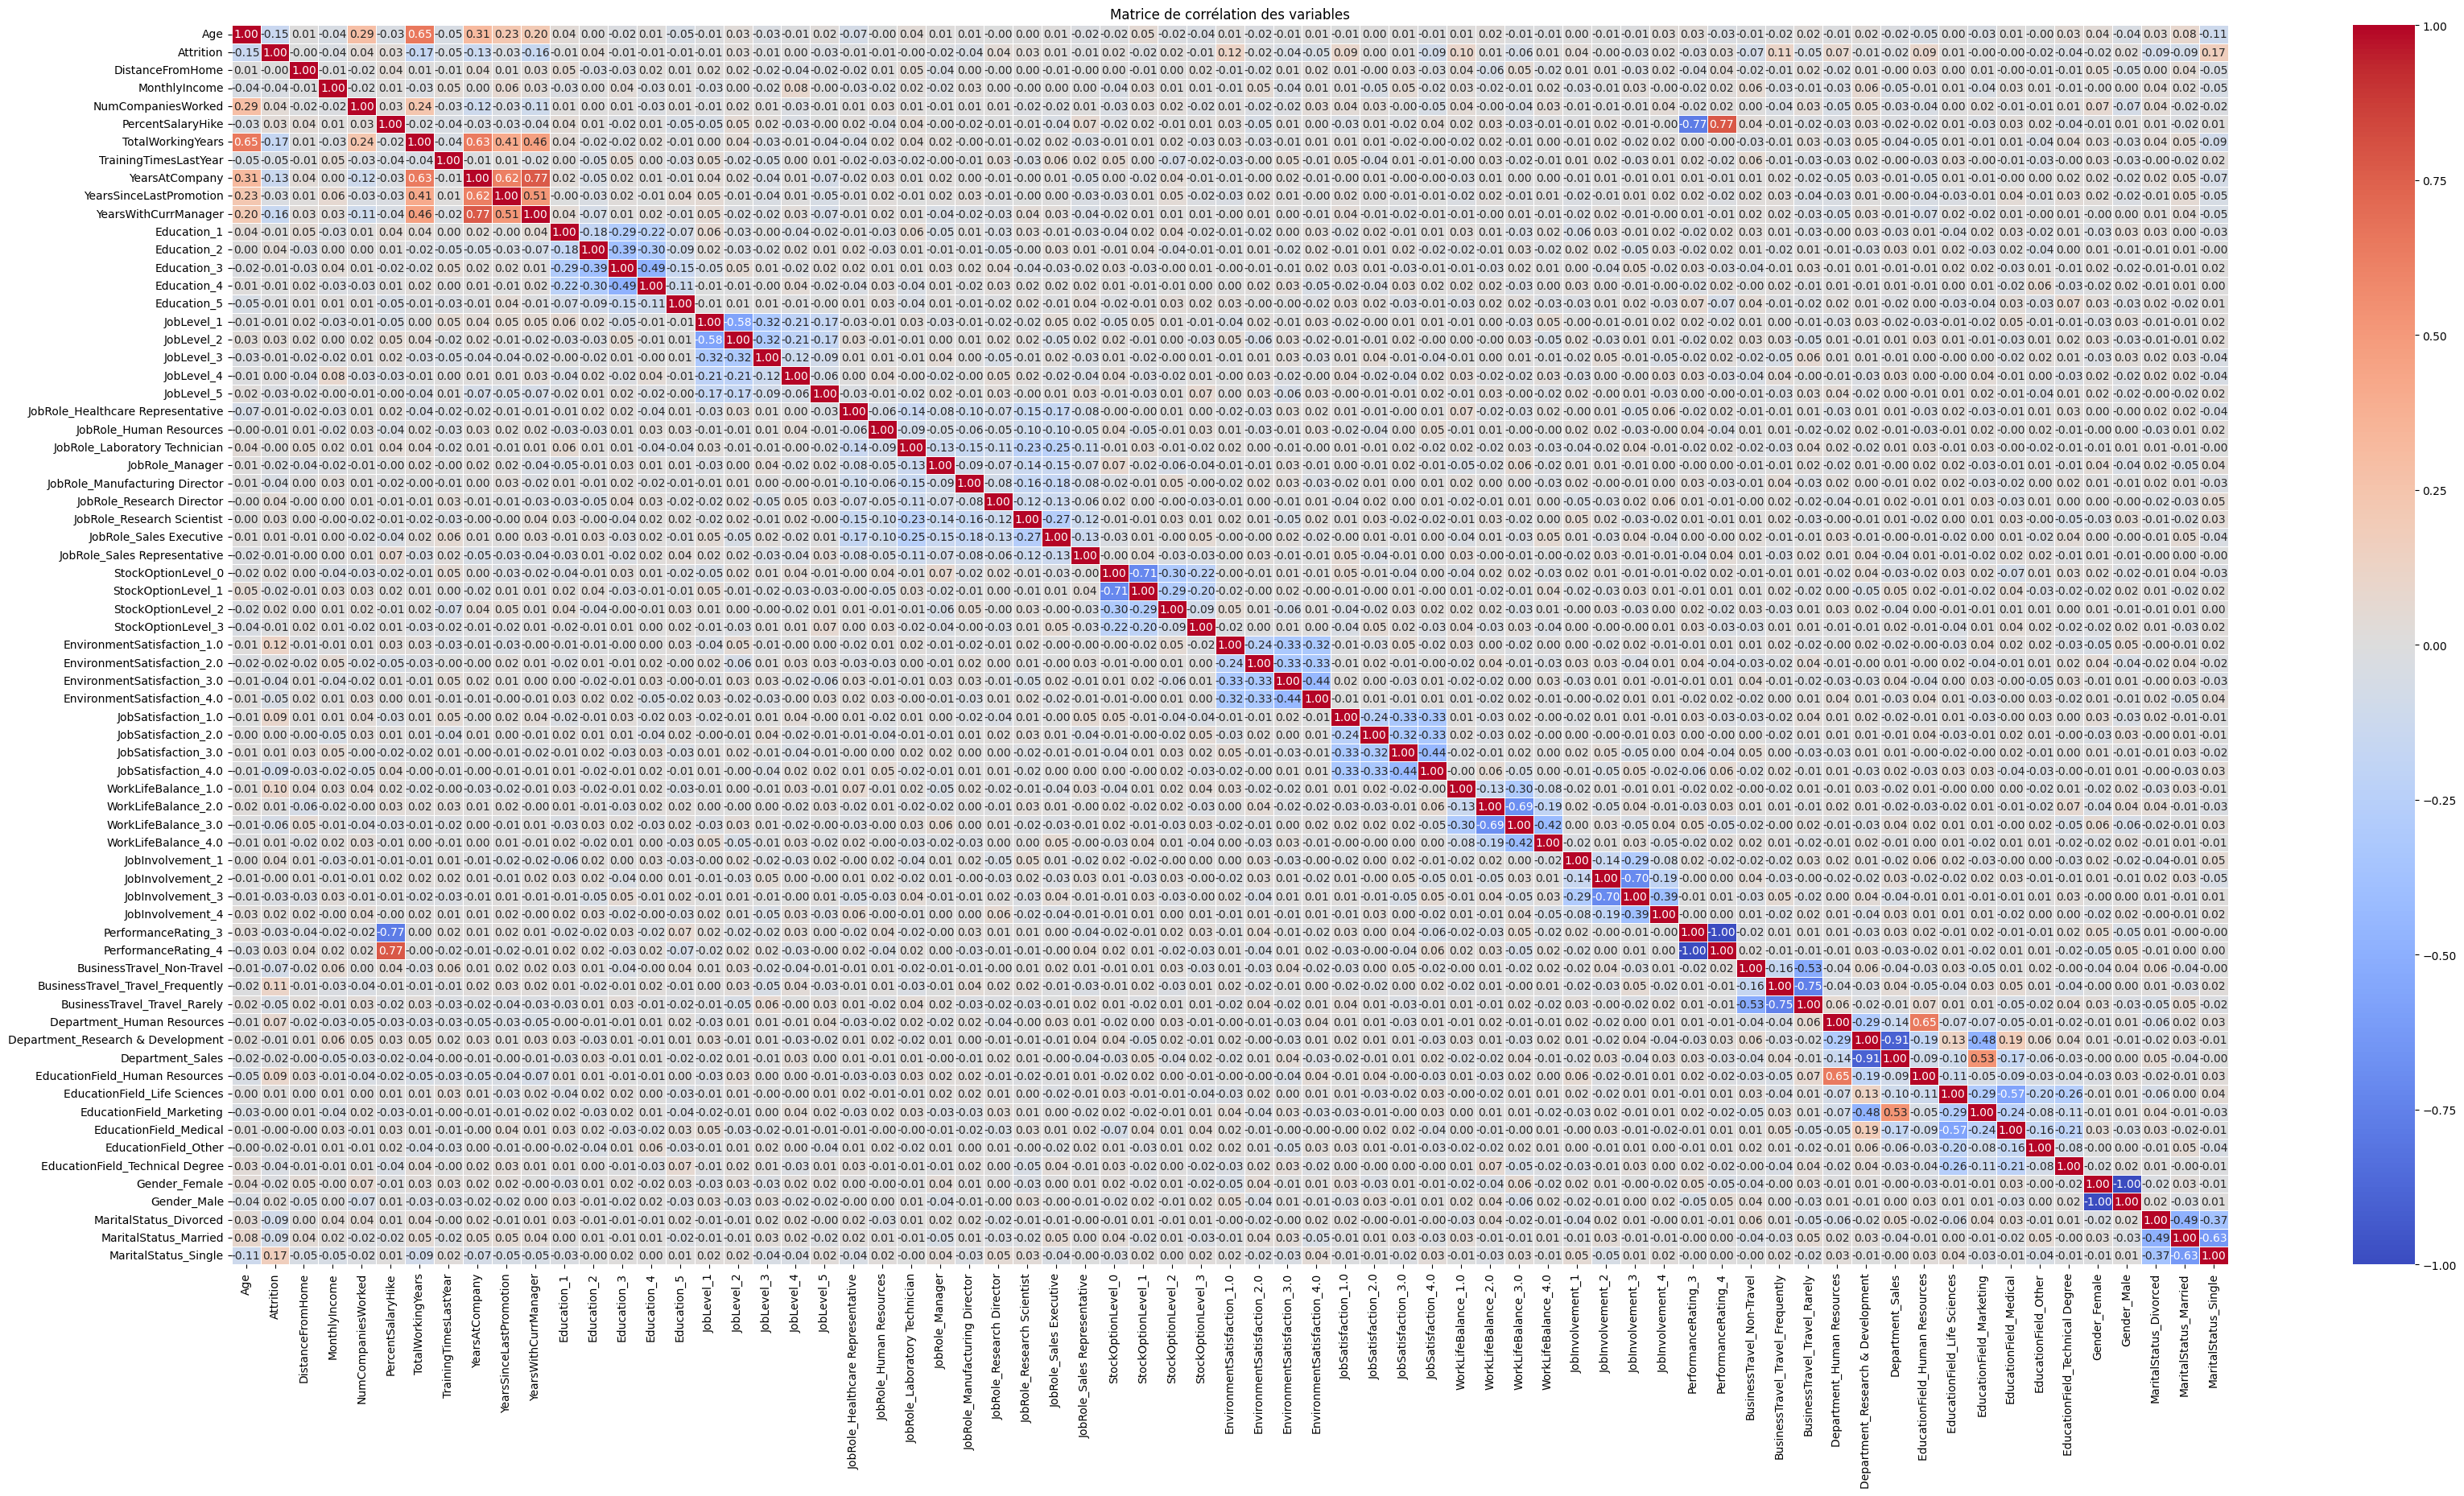

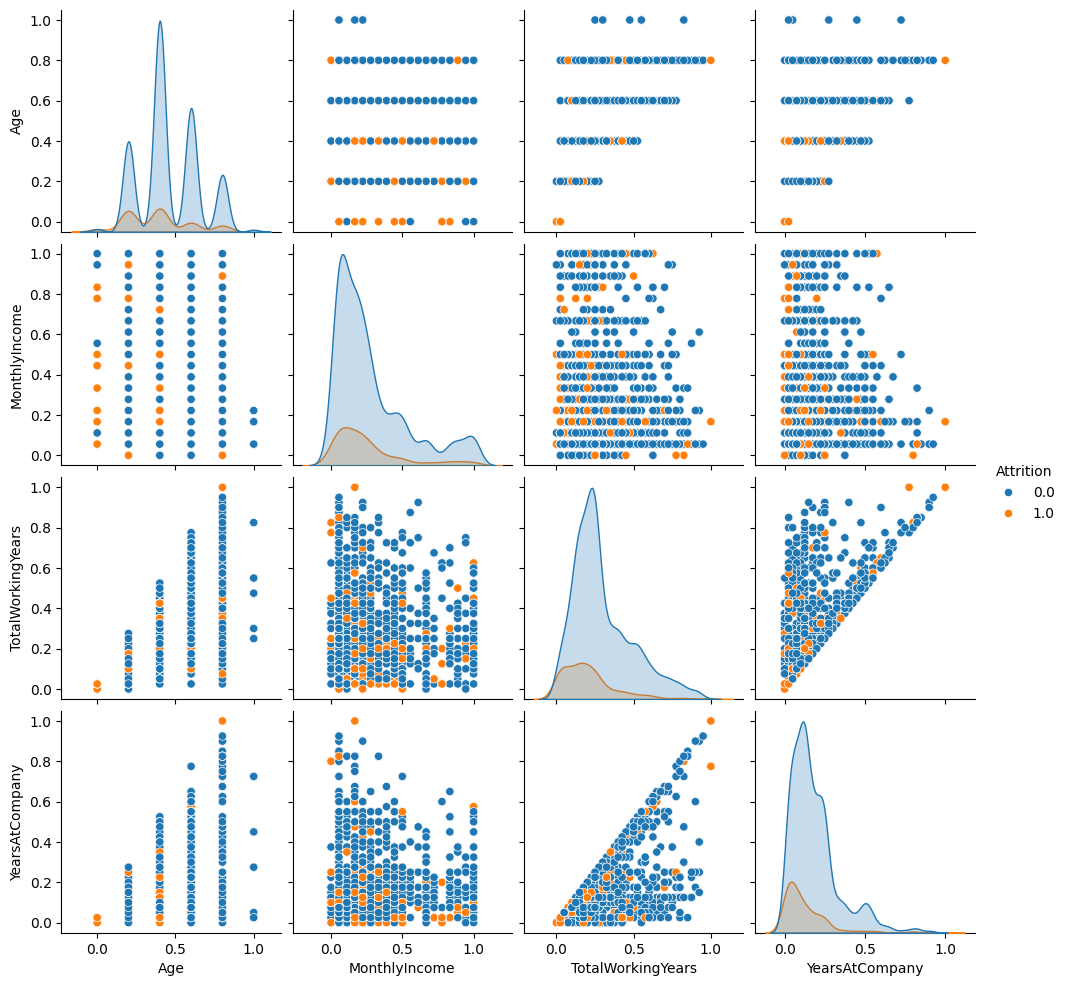

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 20))
corr = dataset.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation des variables")
plt.show()

sns.pairplot(dataset, hue="Attrition", vars=["Age", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany"])
plt.show()

# Découpage des données

Maintenant que nous avons préparé les données, nous allons les diviser en ensembles d'entraînement et de test. Cela nous permettra d'évaluer les performances du modèle sur des données qu'il n'a pas vues pendant l'entraînement.

Nous avons décidé de diviser les données en un ensemble d'entraînement (80%) et un ensemble de test (20%).

In [70]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns='Attrition').values
y = dataset['Attrition'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# print the shapes of the training and testing datasets
print("\n--- Data Splitting ---")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

print(" Séparation des données terminée.")


--- Data Splitting ---
X_train shape: (3440, 68)
y_train shape: (3440,)
X_test shape: (860, 68)
y_test shape: (860,)
 Séparation des données terminée.


# Entrainement des modèles

Nous allons maintenant entraîner plusieurs modèles de classification sur les données d'entraînement et évaluer leurs performances sur les données de test.

Les différents modèles que nous allons entraîner sont les suivants :
- Régression logistique
- Forêt aléatoire
- Perceptron simple

## Création du modèle de régression logistique

Nous allons commencer par entraîner un modèle de régression logistique sur les données d'entraînement.

In [71]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## Perceptron

Nous allons maintenant entraîner un modèle de Perceptron sur les données d'entraînement.

Voici la classe Perceptron que nous allons utiliser pour entraîner le modèle.

In [72]:
class SimplePerceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        print("\n--- Training the Perceptron ---")
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            if epoch % 100 == 0:  # Print every 100 epochs
                print(f"Epoch {epoch}/{self.epochs}")
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                # Perceptron update rule
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

        print("Training completed.")

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        print("\n--- Making Predictions ---")
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        print("Predictions made.")
        return y_predicted

Maintenant que nous avons défini la classe Perceptron, nous allons l'entraîner sur les données d'entraînement.

In [73]:
perceptron = SimplePerceptron(learning_rate=0.01, epochs=1000)
perceptron.fit(X_train, y_train)


--- Training the Perceptron ---
Epoch 0/1000
Epoch 100/1000
Epoch 200/1000
Epoch 300/1000
Epoch 400/1000
Epoch 500/1000
Epoch 600/1000
Epoch 700/1000
Epoch 800/1000
Epoch 900/1000
Training completed.


# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Création du modèle Random Forest avec des paramètres ajustés pour éviter le sur-apprentissage
rf_model = RandomForestClassifier(
    n_estimators=100,  # Nombre d'arbres
    max_depth=10,  # Limiter la profondeur des arbres pour éviter le sur-apprentissage
    min_samples_split=10,  # Augmenter le nombre minimal d'échantillons pour diviser un nœud
    min_samples_leaf=5,  # Augmenter le nombre minimal d'échantillons pour un nœud feuille
    random_state=42, 
    class_weight="balanced"
)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

# Affichage des résultats

## Régression logistique


 Rapport de Classification :
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       721
         1.0       0.61      0.14      0.22       139

    accuracy                           0.85       860
   macro avg       0.73      0.56      0.57       860
weighted avg       0.82      0.85      0.80       860


 Précision du modèle : 0.8465


/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


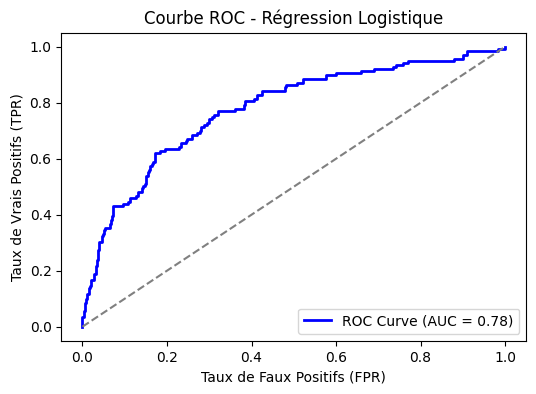

In [83]:
# Prédictions sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Rapport de classification
print("\n Rapport de Classification :\n", classification_report(y_test, y_pred))

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Précision du modèle : {accuracy:.4f}")

# Probabilités pour la courbe ROC
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calcul et affichage de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Ligne de référence
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Régression Logistique")
plt.legend(loc="lower right")
plt.show()

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Création du modèle de régression logistique
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = logreg.predict(X_test)

# Rapport de classification
print("\n Rapport de Classification :\n", classification_report(y_test, y_pred))

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Précision du modèle : {accuracy:.4f}")

# Probabilités pour la courbe ROC
y_pred_prob = logreg.predict_proba(X_test)[:, 1]




 Rapport de Classification :
               precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       721
         1.0       0.61      0.14      0.22       139

    accuracy                           0.85       860
   macro avg       0.73      0.56      0.57       860
weighted avg       0.82      0.85      0.80       860


 Précision du modèle : 0.8465


## Perceptron


--- Making Predictions ---
Predictions made.

--- Dataset Information ---
The dataset has 4300 rows and 69 columns
Accuracy: 66.05%

--- Calculating Metrics ---
True Positives: 438
False Positives: 1203
True Negatives: 2402
False Negatives: 257

--- Plotting Weights ---


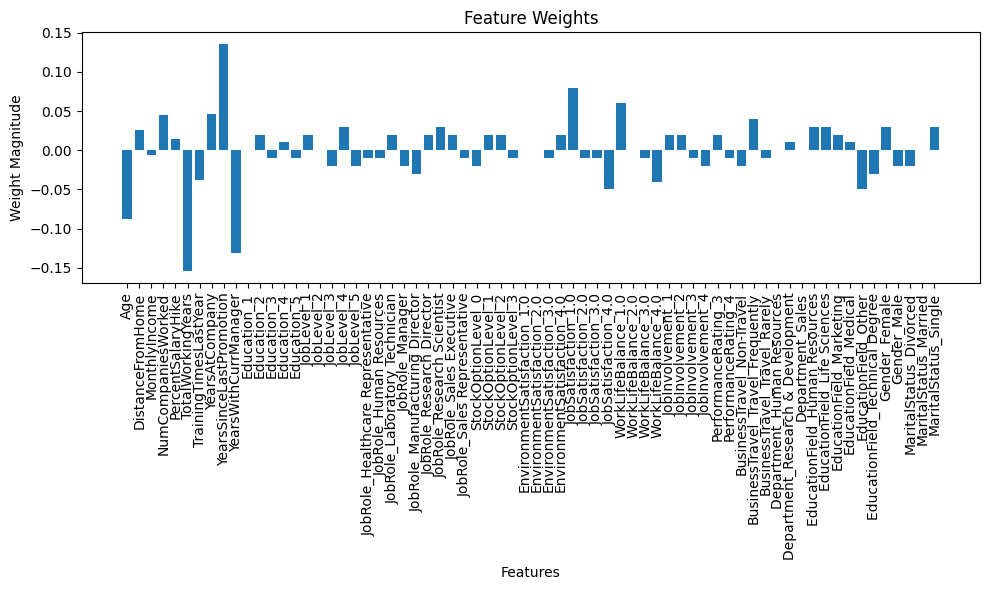

Weights plot saved as 'feature_weights.png'

--- Most Influential Features ---
TotalWorkingYears         -0.154750
YearsSinceLastPromotion    0.136000
YearsWithCurrManager      -0.130588
Age                       -0.088000
JobSatisfaction_1.0        0.080000
WorkLifeBalance_1.0        0.060000
EducationField_Other      -0.050000
JobSatisfaction_4.0       -0.050000
YearsAtCompany             0.046250
NumCompaniesWorked         0.044444
dtype: float64


In [76]:
def plot_weights(weights, feature_names):
    print("\n--- Plotting Weights ---")
    plt.figure(figsize=(10, 6))
    plt.bar(feature_names, weights)
    plt.xlabel('Features')
    plt.ylabel('Weight Magnitude')
    plt.title('Feature Weights')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    print("Weights plot saved as 'feature_weights.png'")

def calculate_metrics(y_true, y_pred):
    print("\n--- Calculating Metrics ---")
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    print(f"True Positives: {tp}")
    print(f"False Positives: {fp}")
    print(f"True Negatives: {tn}")
    print(f"False Negatives: {fn}")

    return tp, fp, tn, fn

# Make predictions
predictions = perceptron.predict(X)

# Print the number of rows and columns
print("\n--- Dataset Information ---")
print("The dataset has {} rows and {} columns".format(dataset.shape[0], dataset.shape[1]))
# Print accuracy
accuracy = np.sum(predictions == y) / len(y)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Calculate and print metrics
tp, fp, tn, fn = calculate_metrics(y, predictions)
# Plot the weights
feature_names = dataset.drop(columns='Attrition').columns
plot_weights(perceptron.weights, feature_names)
# Identify the most influential features
influential_features = pd.Series(perceptron.weights, index=feature_names).sort_values(key=abs, ascending=False)
print("\n--- Most Influential Features ---")
print(influential_features.head(10))  # Affiche les 10 caractéristiques les plus influentes


# Random Forest


 Précision du modèle Random Forest : 0.9465


/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


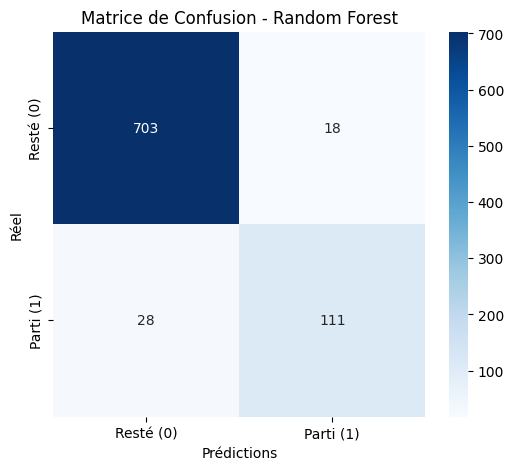


 Rapport de Classification :
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       721
         1.0       0.86      0.80      0.83       139

    accuracy                           0.95       860
   macro avg       0.91      0.89      0.90       860
weighted avg       0.95      0.95      0.95       860


 AUC-ROC (Random Forest) : 0.9804


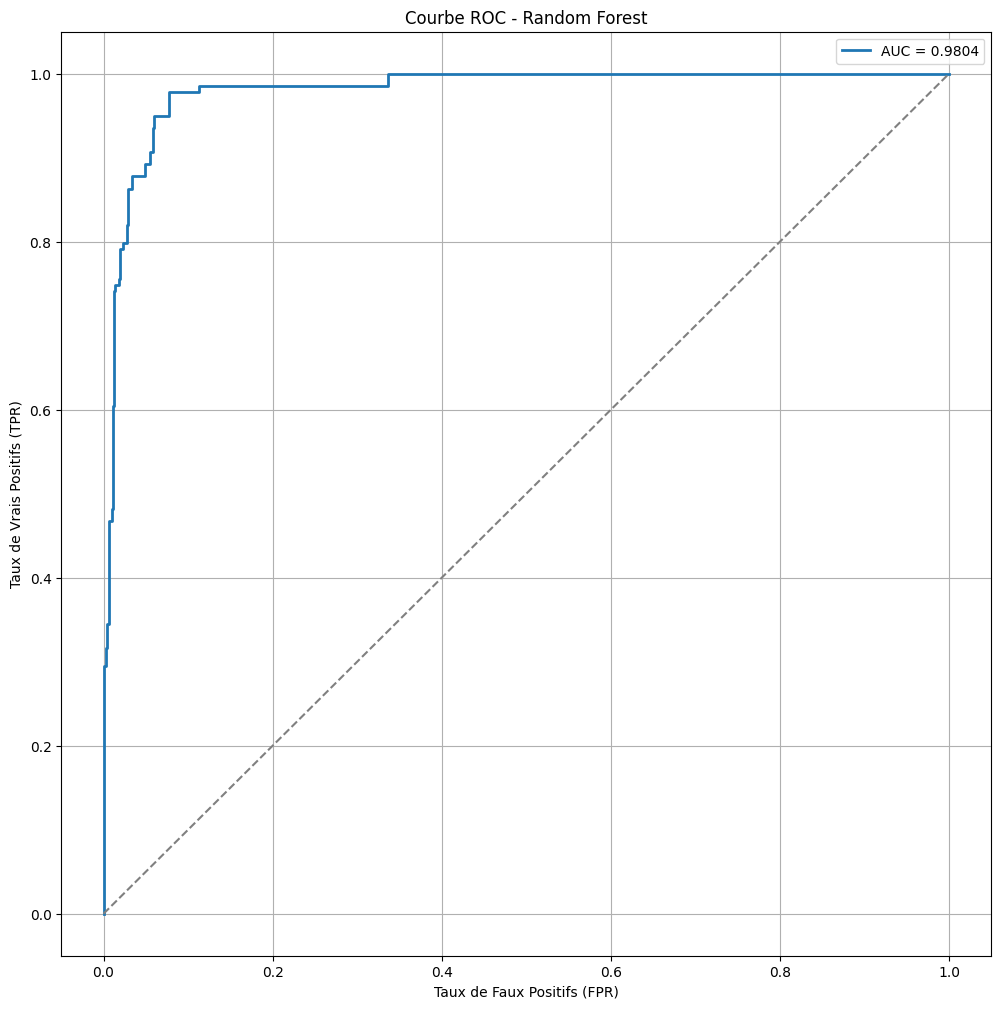

/tmp/ipykernel_480/1968938999.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=positive_impact_df["Feature"], x=positive_impact_df["Importance"], palette="Blues")


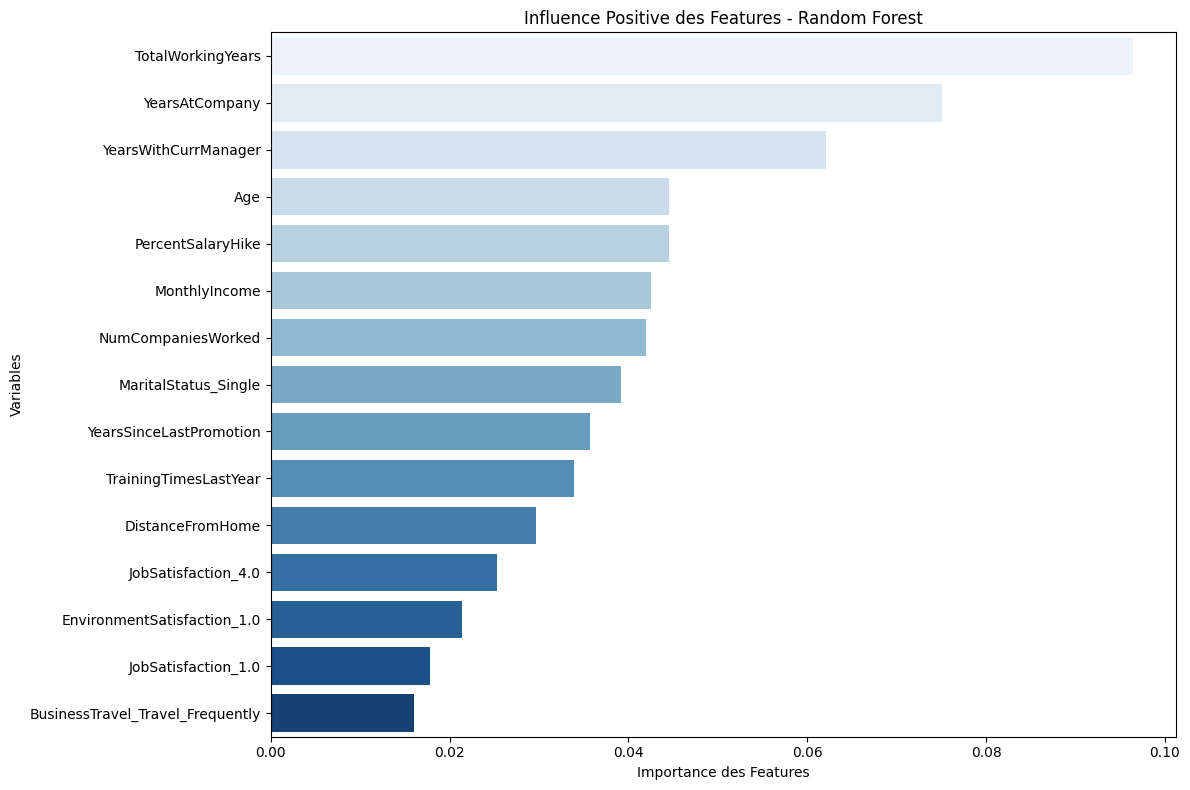

/tmp/ipykernel_480/1968938999.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=negative_impact_df["Feature"], x=negative_impact_df["Importance"], palette="Reds")


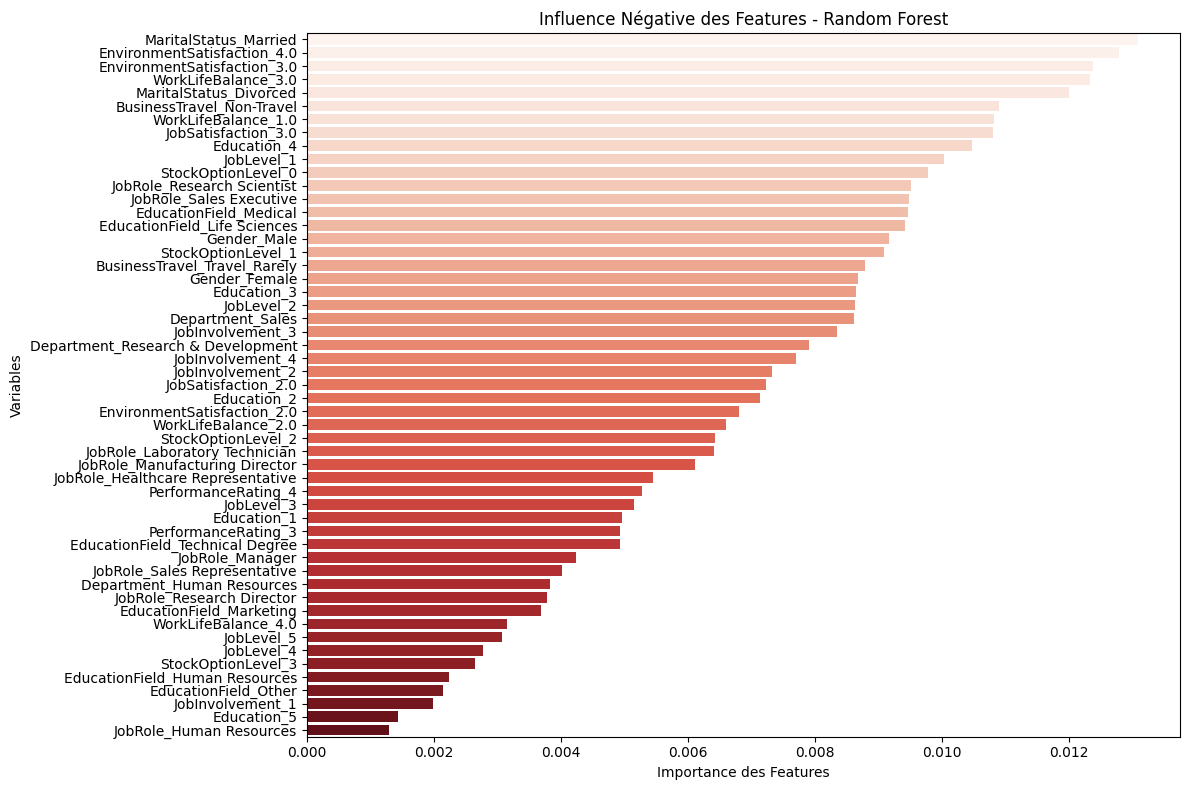

In [84]:
# Prédictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe "1" (départs)

# Calcul et affichage de la précision
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\n Précision du modèle Random Forest : {accuracy_rf:.4f}")

# Matrice de Confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Resté (0)", "Parti (1)"], yticklabels=["Resté (0)", "Parti (1)"])
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.title("Matrice de Confusion - Random Forest")
plt.show()

# Rapport de Classification
print("\n Rapport de Classification :\n", classification_report(y_test, y_pred_rf))

# Calcul du score AUC-ROC
auc_score_rf = roc_auc_score(y_test, y_prob_rf)
print(f"\n AUC-ROC (Random Forest) : {auc_score_rf:.4f}")

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr, label=f"AUC = {auc_score_rf:.4f}", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Ligne de référence
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC - Random Forest")
plt.legend()
plt.grid()
plt.show()
# Si X_train est un numpy.ndarray, on le convertit en DataFrame avec les noms des colonnes
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)  # feature_names doit être défini avec les noms des caractéristiques

# Extraction de l'importance des variables dans le modèle Random Forest
feature_importance = rf_model.feature_importances_

# Création d'un DataFrame associant chaque attribut à son importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Détermination de l'influence positive et négative (on considère les valeurs au-dessus ou en-dessous d'un seuil moyen)
mean_importance = importance_df['Importance'].mean()
positive_impact_df = importance_df[importance_df['Importance'] >= mean_importance].sort_values(by='Importance', ascending=False)
negative_impact_df = importance_df[importance_df['Importance'] < mean_importance].sort_values(by='Importance', ascending=False)

# Affichage des variables avec influence positive
plt.figure(figsize=(12, 8))
sns.barplot(y=positive_impact_df["Feature"], x=positive_impact_df["Importance"], palette="Blues")
plt.xlabel("Importance des Features")
plt.ylabel("Variables")
plt.title("Influence Positive des Features - Random Forest")
plt.tight_layout()
plt.show()

# Affichage des variables avec influence négative
plt.figure(figsize=(12, 8))
sns.barplot(y=negative_impact_df["Feature"], x=negative_impact_df["Importance"], palette="Reds")
plt.xlabel("Importance des Features")
plt.ylabel("Variables")
plt.title("Influence Négative des Features - Random Forest")
plt.tight_layout()
plt.show()



/tmp/ipykernel_480/2846008014.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")


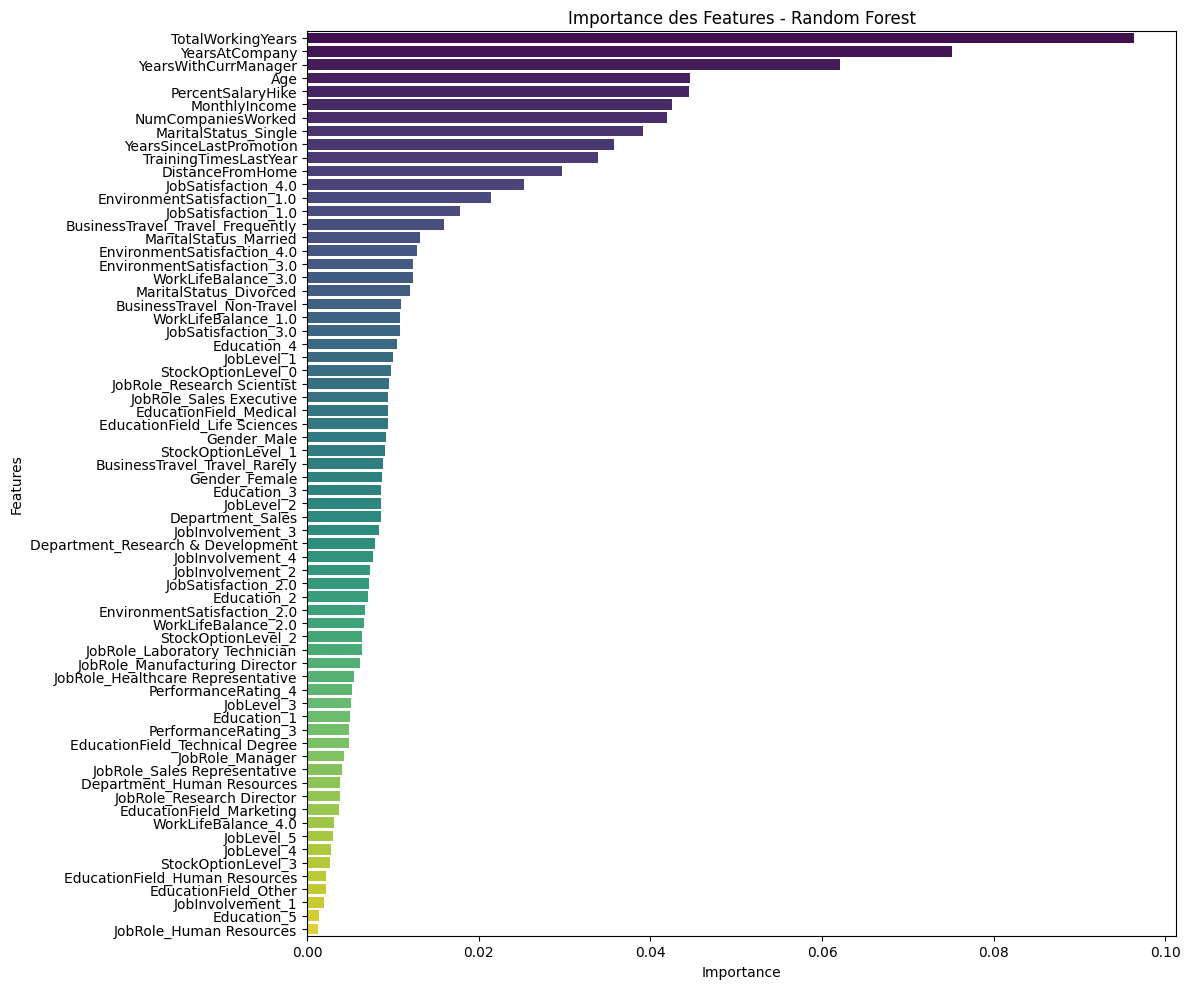

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Si X_train est un ndarray, vous devez le convertir en DataFrame
# Assurez-vous que vous avez les noms des colonnes dans une liste appelée 'feature_names'
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Supposons que vous avez déjà le modèle 'rf_model' entraîné
# Vous pouvez obtenir les importances des features du modèle RandomForest directement
feature_importance = pd.DataFrame({
    'Feature': X_train_df.columns,  # Noms des features
    'Importance': rf_model.feature_importances_  # Importances des features
})

# Tri des features par importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Affichage des features les plus influentes
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")

# Ajouter un titre et des labels
plt.title("Importance des Features - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Comparaison des modèles

In [85]:
# Prédictions pour chaque modèle
y_pred_logreg = logreg.predict(X_test)  # Prédictions de la régression logistique
y_pred_rf = rf_model.predict(X_test)    # Prédictions du Random Forest
y_pred_perceptron = perceptron.predict(X_test)  # Prédictions du Perceptron


--- Making Predictions ---
Predictions made.


/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


                 Model  Precision    Recall  F1 Score       AUC  Accuracy
0  Logistic Regression   0.612903  0.136691  0.223529  0.777308  0.846512
1        Random Forest   0.860465  0.798561  0.828358  0.980413  0.946512
2           Perceptron   0.247588  0.553957  0.342222       NaN  0.655814


/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


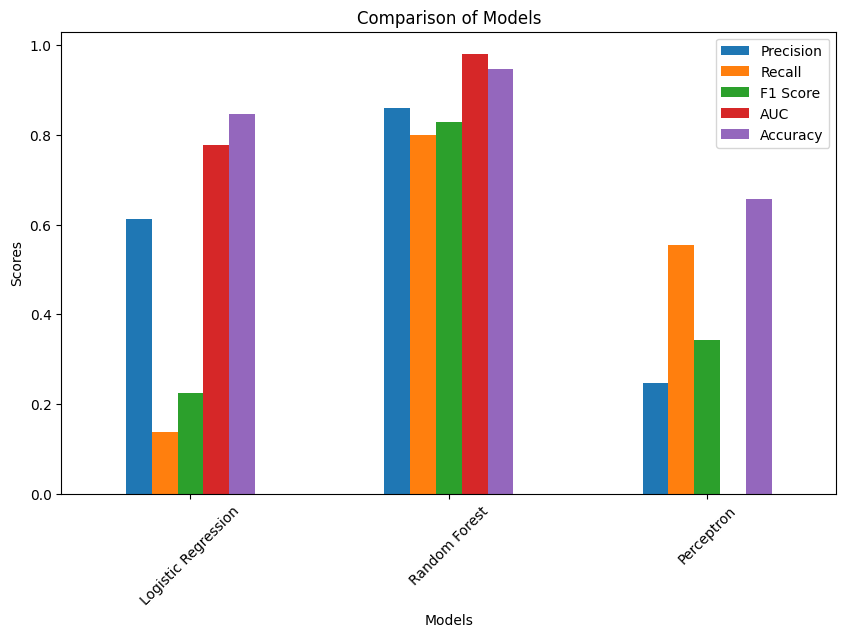

In [86]:
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Dictionnaire des modèles
models = {
    'Logistic Regression': logreg,  # Assurez-vous que le modèle est déjà entraîné
    'Random Forest': rf_model,  # Assurez-vous que le modèle RandomForest est déjà entraîné
    'Perceptron': perceptron  # Assurez-vous que le modèle Perceptron est déjà entraîné
}

# Dictionnaire pour stocker les prédictions de chaque modèle
predictions = {
    'Logistic Regression': y_pred_logreg,  # Remplacez par les prédictions de la régression logistique
    'Random Forest': y_pred_rf,  # Remplacez par les prédictions du Random Forest
    'Perceptron': y_pred_perceptron  # Remplacez par les prédictions du perceptron
}

# Liste pour stocker les scores
scores = []

# Calcul des métriques pour chaque modèle
for name, model in models.items():
    y_pred = predictions[name]
    
    # Si le modèle a la méthode 'predict_proba', nous calculons l'AUC-ROC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe "1" (départs)
        auc_score = roc_auc_score(y_test, y_proba)
    else:
        auc_score = None  # Si le modèle n'a pas la méthode 'predict_proba'

    # Calcul des autres métriques
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)  # Calcul de la précision

    # Ajouter les résultats à la liste
    scores.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc_score,
        'Accuracy': accuracy  # Précision du modèle ajoutée ici
    })

# Convertir les scores en DataFrame pour une visualisation facile
scores_df = pd.DataFrame(scores)

# Afficher les scores des trois modèles
print(scores_df)

# Optionnel : Affichage graphique pour comparaison
scores_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.show()


/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


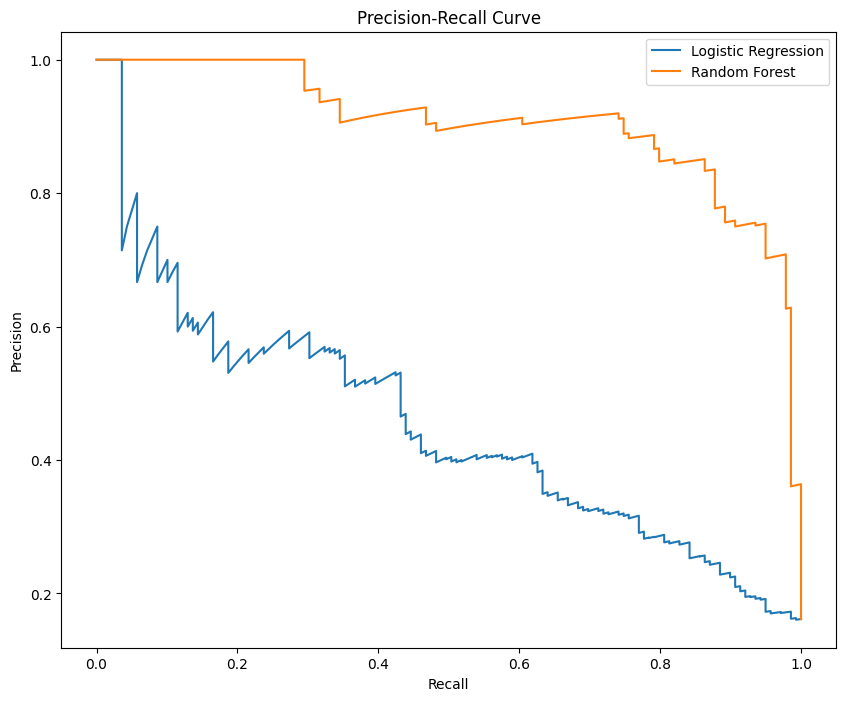

/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/antoine/02_Cesi/04_A4/04_AI/02_Projet/CESI_A4_InteArti_Project/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


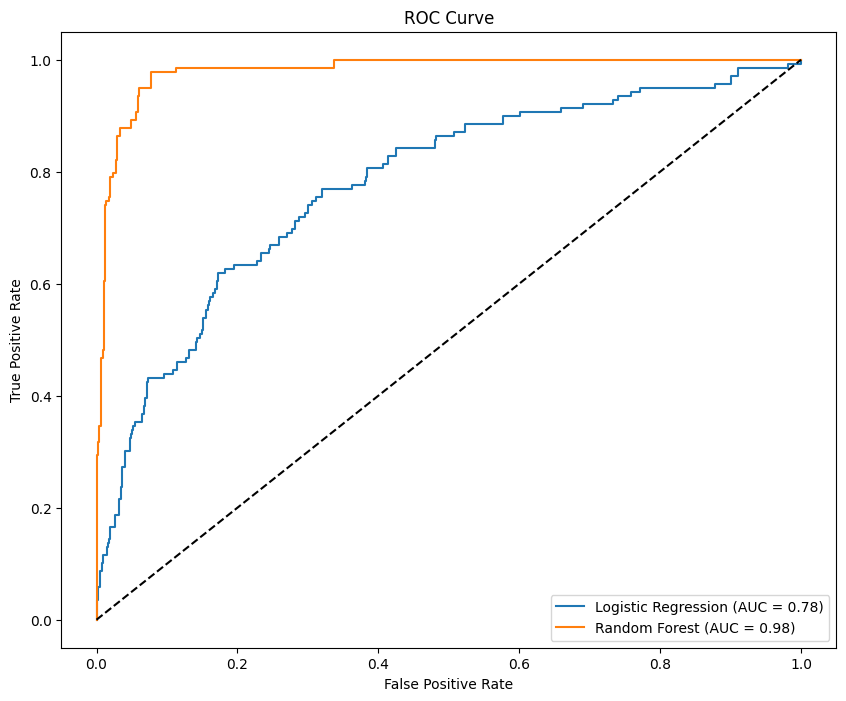

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Dictionnaire des modèles
models = {
    'Logistic Regression': logreg,  # Assurez-vous que le modèle est déjà entraîné
    'Random Forest': rf_model,  # Assurez-vous que le modèle RandomForest est déjà entraîné
    'Perceptron': perceptron  # Assurez-vous que le modèle Perceptron est déjà entraîné
}

# Dictionnaire pour stocker les prédictions de chaque modèle
predictions = {
    'Logistic Regression': y_pred_logreg,  # Remplacez par les prédictions de la régression logistique
    'Random Forest': y_pred_rf,  # Remplacez par les prédictions du Random Forest
    'Perceptron': y_pred_perceptron  # Remplacez par les prédictions du perceptron
}

# Liste pour stocker les scores
scores = []

# Calcul des métriques pour chaque modèle
for name, model in models.items():
    y_pred = predictions[name]
    
    # Si le modèle a la méthode 'predict_proba', nous calculons l'AUC-ROC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe "1" (départs)
        auc_score = roc_auc_score(y_test, y_proba)
    else:
        auc_score = None  # Si le modèle n'a pas la méthode 'predict_proba'

    # Calcul des autres métriques
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)  # Calcul de la précision

    # Ajouter les résultats à la liste
    scores.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc_score,
        'Accuracy': accuracy  # Précision du modèle ajoutée ici
    })

# Convertir les scores en DataFrame pour une visualisation facile
scores_df = pd.DataFrame(scores)


# Tracer les courbes Precision-Recall
plt.figure(figsize=(10, 8))
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, precision_recall_curve, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Dictionnaire des modèles
models = {
    'Logistic Regression': logreg,  # Assurez-vous que le modèle est déjà entraîné
    'Random Forest': rf_model,  # Assurez-vous que le modèle RandomForest est déjà entraîné
    'Perceptron': perceptron  # Assurez-vous que le modèle Perceptron est déjà entraîné
}

# Dictionnaire pour stocker les prédictions de chaque modèle
predictions = {
    'Logistic Regression': y_pred_logreg,  # Remplacez par les prédictions de la régression logistique
    'Random Forest': y_pred_rf,  # Remplacez par les prédictions du Random Forest
    'Perceptron': y_pred_perceptron  # Remplacez par les prédictions du perceptron
}

# Liste pour stocker les scores
scores = []

# Calcul des métriques pour chaque modèle
for name, model in models.items():
    y_pred = predictions[name]
    
    # Si le modèle a la méthode 'predict_proba', nous calculons l'AUC-ROC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe "1" (départs)
        auc_score = roc_auc_score(y_test, y_proba)
    else:
        auc_score = None  # Si le modèle n'a pas la méthode 'predict_proba'

    # Calcul des autres métriques
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)  # Calcul de la précision

    # Ajouter les résultats à la liste
    scores.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': auc_score,
        'Accuracy': accuracy  # Précision du modèle ajoutée ici
    })

# Convertir les scores en DataFrame pour une visualisation facile
scores_df = pd.DataFrame(scores)


# Tracer les courbes Precision-Recall
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_proba)
        plt.plot(recall, precision, label=f"{name}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Tracer les courbes ROC
plt.figure(figsize=(10, 8))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
